# Visualización con Matplotlib

Recorrido por las diferentes opciones que tenemos a la hora de realizar gráficos. Se utilizarán [Matplotlib](https://matplotlib.org/stable/index.html) y [Plotly](https://plotly.com/) como backend de los gráficos y también resutará utils la libreria [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) para realizar visualizaciones de manera más simple y rápida.


Empezamos, importamos las librerias a utilizar.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Matplotlib

Matplotlib será el backend de nuestros gráficos. Veremos que cada gráfico de matplotlib se compone por un objeto del tipo **Figure**, que será donde se grafiquen los datos. Cada figura contiene uno o más ejes, llamados **Axes**. Dentro de estos objetos podremos acceder a métodos y atributos que nos permitirán graficar los datos y configurar nuestros gráficos.

Primer acercamiento

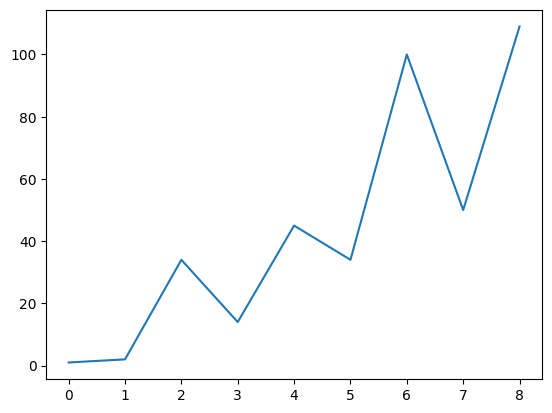

In [20]:
plt.plot([1,2,34,14,45,34,100, 50,109])

Ahora creamos un objeto Figure (fig) y otro Axes (ax). Luegos gráficamos unos puntos.

C:\Users\perez\AppData\Local\Temp\ipykernel_18644\200355232.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


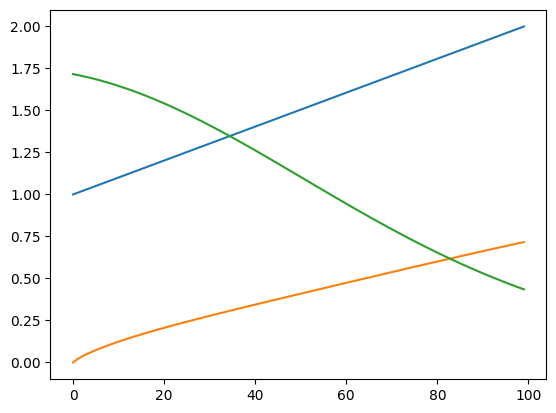

In [21]:
fig, ax = plt.subplots()

z1 = np.linspace(1, 2, 100)
z2 = np.log(z1) ** np.sin(z1)
z3 = np.exp(z1) ** np.cos(z1)

ax.plot(z1)
ax.plot(z2)
ax.plot(z3)

fig.show()

Le podemos agregar un título y nombre a los ejes, al igual que etiquetas a cada una de las trazas.

C:\Users\perez\AppData\Local\Temp\ipykernel_18644\52273464.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


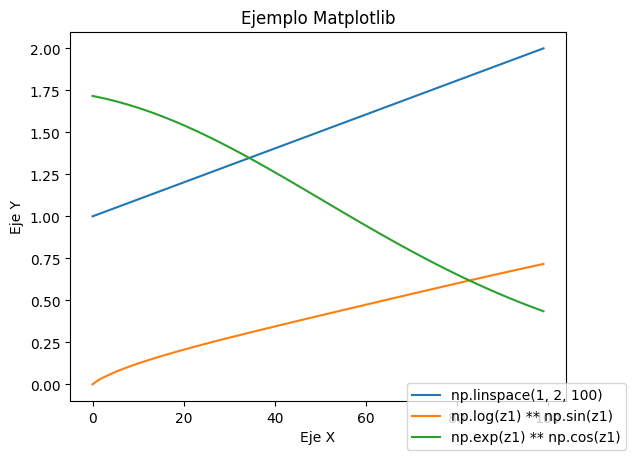

In [22]:
fig, ax = plt.subplots()

ax.set_title('Ejemplo Matplotlib')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

ax.plot(z1, label = 'np.linspace(1, 2, 100)')
ax.plot(z2, label = 'np.log(z1) ** np.sin(z1)')
ax.plot(z3, label = 'np.exp(z1) ** np.cos(z1)')

fig.legend(loc=4, ) # Muestra leyenda
fig.show()

Tambien podemos visualizar tres gráficos distintos en una misma figura. De la misma manera se podría configurar cada uno de los ejes.

C:\Users\perez\AppData\Local\Temp\ipykernel_18644\1713698126.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


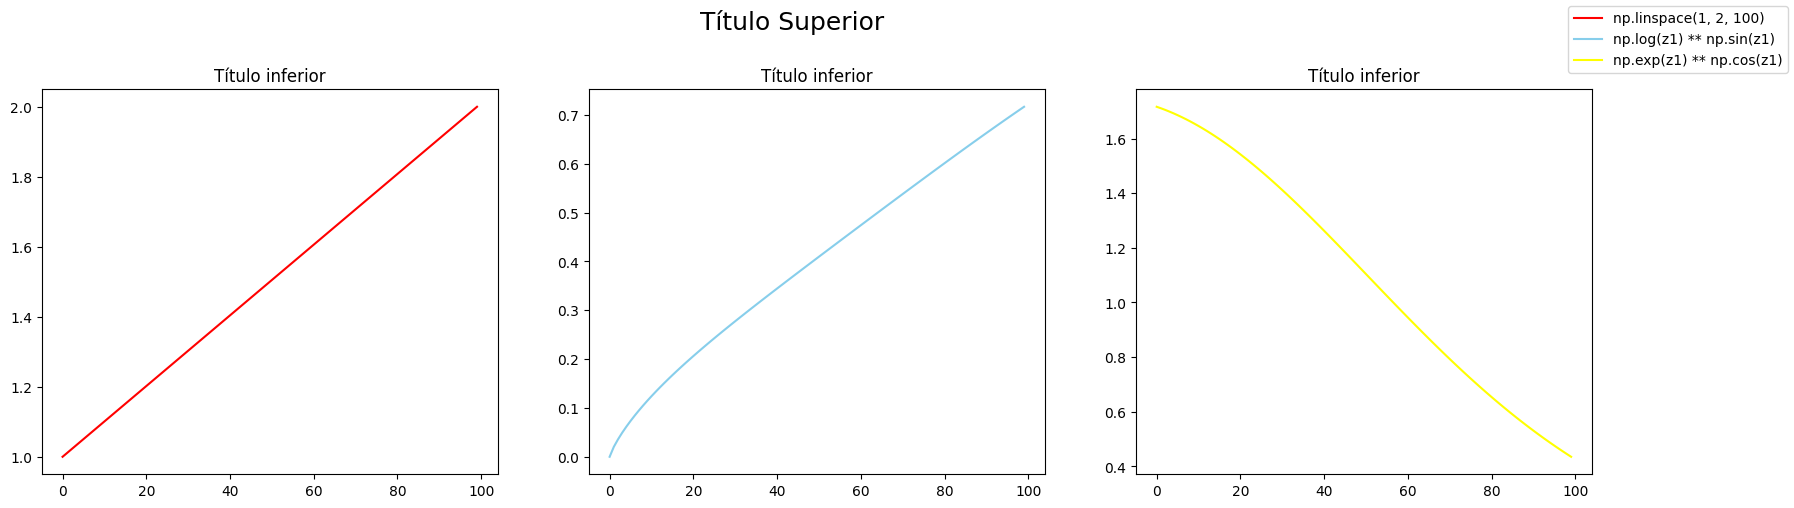

In [23]:
fig, ax = plt.subplots(figsize = (20,5), ncols=3, nrows=1)

# Titulo de la figura
fig.suptitle('Título Superior', fontsize=18, y = 1.04)

# Titulo de cada eje
ax[0].set_title('Título inferior')
ax[1].set_title('Título inferior')
ax[2].set_title('Título inferior')

ax[0].plot(z1, color='red', label = 'np.linspace(1, 2, 100)')
ax[1].plot(z2, color='skyblue', label = 'np.log(z1) ** np.sin(z1)')
ax[2].plot(z3, color='yellow', label = 'np.exp(z1) ** np.cos(z1)')


fig.legend()
fig.show()

## World Bank Data API

In [24]:
#!pip install wbdata
import wbdata

Vemos el principal funcionamiento de la API.

Se sugiere recorrer la fuente de datos.

In [25]:
#wbdata.get_source()

In [27]:
# Source 12: indicares de genero
wbdata.get_indicator(source=14)

AttributeError: module 'wbdata' has no attribute 'get_indicator'

## Graficando con Pandas

### Grafico de torta

In [28]:
indicadores = {'HD.HCI.LAYS.FE':'educacion_femenina','HD.HCI.LAYS.MA':'educacion_masculina'}

data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])

df = pd.DataFrame(data=data)

In [ ]:
df.head()

In [29]:
aux = df.reset_index()
aux = aux.loc[aux['date'] == '2020'] # Vemos que la fecha esta en formato string.
aux['educacion_femenina'] = aux['educacion_femenina'].astype(float)
aux['educacion_masculina'] = aux['educacion_masculina'].astype(float)
aux.set_index('country', inplace=True)
aux = aux[['educacion_femenina', 'educacion_femenina']]

Hacemos un gráfico de tortas para comparar la educación por género entre Argentina y Estado Unidos de manera relativa.

Text(0.5, 1.0, 'Educación masculina USA vs ARG')

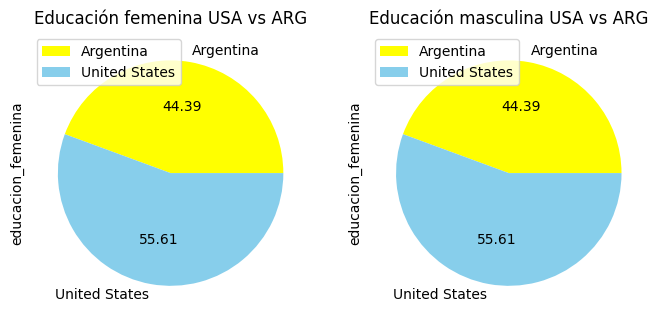

In [ ]:
ax1, ax2 = aux.plot.pie(subplots=True,figsize=(8,4), colors=['yellow', 'skyblue'],
                      autopct='%.2f')

ax1.set_title('Educación femenina USA vs ARG', color='black')
ax2.set_title('Educación masculina USA vs ARG', color='black')

### Serie de tiempo

Vemos la educacion en la poblacion a lo largo de los años

In [30]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)


# Porcentaje de no educacion en la población
indicadores = {'BAR.NOED.1519.ZS':'15-19','BAR.NOED.2024.ZS':'20-24',
              'BAR.NOED.2529.ZS':'25-29', 'BAR.NOED.3034.ZS':'30-34',
              'BAR.NOED.3539.ZS':'35-39' , 'BAR.NOED.4044.ZS':'40-44',
              'BAR.NOED.4549.ZS':'45-49', 'BAR.NOED.5054.ZS':'50-54',
              'BAR.NOED.5559.ZS':'55-59'}

data = wbdata.get_dataframe(indicadores, country = 'ARG', data_date = date_time)
df = pd.DataFrame(data=data)

TypeError: got an unexpected keyword argument 'data_date'

In [31]:
print('Valores nulos:',sum(df.isna().sum()))

Valores nulos: 28


El dataset contiene va desde el año 1950 a 2010 y con ddatos cada cinco años. Como vamos a enfocarnos en la visualizacion dejamos los datos nulos de lado.

In [32]:
df.dropna(inplace=True)

Breve resumen descriptivo

In [ ]:
df.describe()

,educacion_femenina,educacion_masculina
count,8.000000,8.000000
mean,9.729911,9.542628
std,1.127719,1.242291
min,8.494050,7.908725
25%,8.738331,8.594137
50%,9.660088,9.562054
75%,10.689626,10.539054
max,11.190000,11.090000


Graficamos el porcentaje de la poblacion no educado de toda la población para distintas categorías de edades.

In [33]:
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df.iloc[5,].plot(style = ('--'), label = '1990', legend = True)
df.iloc[1,].plot(style = '-', label = '2010', legend = True)
plt.title('Porcentaje de no educación')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

IndexError: single positional indexer is out-of-bounds

Esta vez lo hacemos sólo para la población femenina.

In [34]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)

# Porcentaje de mujeres sin educacion por rango etario
indicadores = {'BAR.NOED.1519.FE.ZS':'15-19','BAR.NOED.2024.FE.ZS':'20-24',
              'BAR.NOED.2529.FE.ZS':'25-29', 'BAR.NOED.3034.FE.ZS':'30-34',
              'BAR.NOED.3539.FE.ZS':'35-39' , 'BAR.NOED.4044.FE.ZS':'40-44',
              'BAR.NOED.4549.FE.ZS':'45-49', 'BAR.NOED.5054.FE.ZS':'50-54',
              'BAR.NOED.5559.FE.ZS':'55-59'}

df1 = wbdata.get_dataframe(indicadores, country = 'ARG', data_date=date_time)
df1.dropna(inplace = True)

TypeError: got an unexpected keyword argument 'data_date'

Porcentaje no educado de la población femenina.

In [18]:
df1.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[5,].plot(style = '-.', label = '1990', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010', legend = True)
plt.title('Porcentaje de no educación femenino')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

NameError: name 'df1' is not defined

Ahora comparamos la educacion de la población total vs población femenina en los años 1970 y 2010.

NameError: name 'df1' is not defined

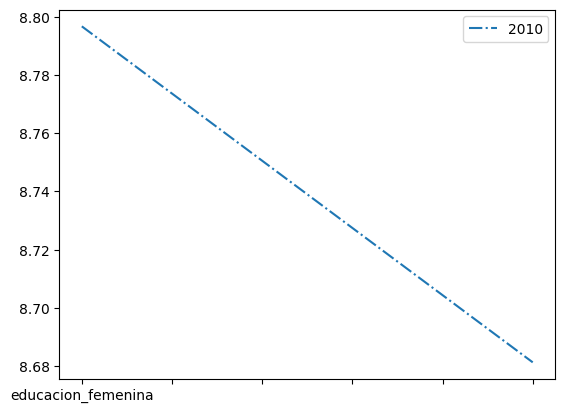

In [35]:
# 2010
df.iloc[1,].plot(style = '-.', label = '2010', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010-F', legend = True)
# 1970
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[8,].plot(style = '-.', label = '1970-F', legend=True)
plt.title('Comparación no educación mujeres y población')
plt.xlabel('Edad', color = 'grey')
plt.ylabel('Porcentaje', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Vemos que luego de 40 años la brecha se acoto.

## Gráfico de barras


In [36]:
df.head(5)

educacion_femenina  educacion_masculina
country       date                                         
Argentina     2020            8.494050             8.332441
              2018            8.796667             8.681369
              2017            8.970000             8.770000
              2010            8.563321             7.908725
United States 2020           10.641717            10.475918

Text(0, 0.5, 'Porcentaje')

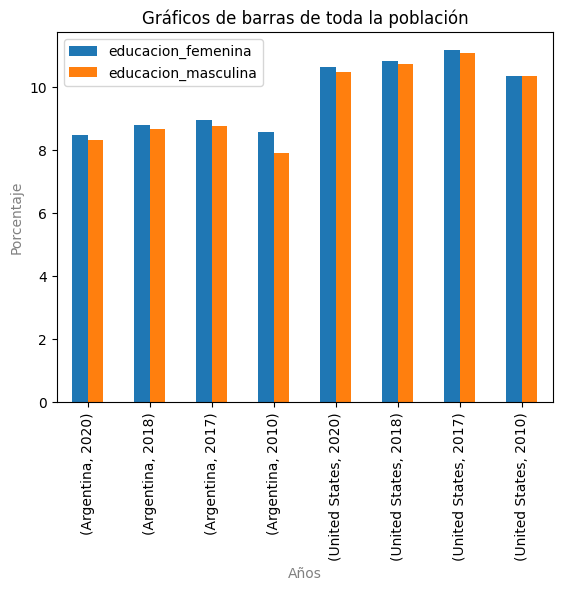

In [37]:
ax = df.plot(kind='bar',
       title='Gráficos de barras de toda la población')
ax.set_xlabel('Años',color='grey')
ax.set_ylabel('Porcentaje',color='grey')

Lo hacemos en horizontal y apilamos la población en una barra.

In [38]:
ax = df1.plot.barh(stacked=True)
ax.set_title('Graficos de barras apilados')
ax.set_xlabel('Porcentaje',color='grey')
ax.set_ylabel('Años',color='grey')

NameError: name 'df1' is not defined

## Histogramas

Vamos a trabajar con el [Indice de facilidad para hacer negocios](https://es.wikipedia.org/wiki/%C3%8Dndice_de_facilidad_para_hacer_negocios) en distintos países.


Seleccionamos los paises a utilizar y creamos el dataframe.

In [39]:
paises = [i['id'] for i in wbdata.get_country(incomelevel=['LIC','HIC'])]

# Seleccionamos nuestros nuevos datos
indicadores = {"IC.BUS.EASE.XQ": "indice_negocio", "NY.GDP.PCAP.PP.KD": "PIBPC"}

data = wbdata.get_dataframe(indicadores, country=paises, convert_date=True)
df = pd.DataFrame(data=data)

AttributeError: module 'wbdata' has no attribute 'get_country'

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
plt.figure()
df['PIBPC'].plot.hist(alpha=0.7,  # Con alpha seteamos la transparencia
                     color='y',
                     bins=9,
                     title='Distribución del PIB per capita')
plt.xlabel('PIB per capita', color='grey')
plt.ylabel('Frecuencia',color='grey')

## Box plot

In [ ]:
df['PIBPC'].plot.box(title='Diagrma de caja PIB')

Recordamos que dentro de la caja se encuentra el 50% de la población. La línea verde indica la mediana.

## Scatter plot

Hacemos un gráfico de dispersión entre las variables PIB p/ capita e Indice de facilidad p/ hacer negocios.

In [ ]:
df.plot.scatter(y='PIBPC', x='indice_negocio',
                c='r',
                s=df['PIBPC']**0.4    # Con s seteamos el tamaño de los puntos
               )

plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

Es intuitivo que en los países con más facilidad para los negocios tienen un PIB per capita más alto.

Finalmente vemos una variante al gráfico de dispersión, un gráfico hexagonal.

In [ ]:
df.plot.hexbin(y='PIBPC', x='indice_negocio', gridsize=15,
              title='Gráfico de dispersión hexagonal')
plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

## Plotly

En esta sección utilizaremos la librería [Plotly](https://plotly.com/) para realizar los gráficos. En principio se usará [Plotly Express](https://plotly.com/python/plotly-express/) Luego, en más profundidad se vera un ejemplo con la librería [Plotly Graph Objects](https://plotly.com/python/graph-objects/) que nos permitirá una mayor configuración de los gráficos.

In [41]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.8 MB 10.7 MB/s eta 0:00:01
   -------------- ------------------------- 3.7/9.8 MB 8.7 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 9.3 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 9.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\perez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
import plotly.express as px
import plotly.graph_objects as go

In [43]:
a = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/dataset_reporte_covid_sitio_gobierno.csv')
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51844 entries, 0 to 51843
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FECHA          51844 non-null  object 
 1   TIPO_REPORTE   51844 non-null  object 
 2   TIPO_DATO      51844 non-null  object 
 3   SUBTIPO_DATO   51844 non-null  object 
 4   VALOR          51844 non-null  float64
 5   FECHA_PROCESO  51844 non-null  object 
 6   ID_CARGA       51844 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [44]:
a['FECHA'] = pd.to_datetime(a['FECHA'], format='%d%b%Y:%H:%M:%S')

Veamos la ocupacion de camas en hospitales del sistema público.

In [45]:
a.sort_values(by='FECHA', inplace=True)
aux1 = a.loc[(a['TIPO_DATO'] == 'ocupacion_de_camas_sistema_publico')  &  (a['SUBTIPO_DATO'].isin(['graves_total', 'graves_arm', 'graves_no_arm']))]
aux2 = a.loc[(a['TIPO_DATO'] == 'total_de_camas_sistema_publico') & (a['SUBTIPO_DATO'] == 'graves')]
aux2.replace({'graves':'camas'}, inplace = True)

aux = aux1.append(aux2)


px.line(data_frame = aux, x = 'FECHA', y='VALOR', color='SUBTIPO_DATO', title='Ocupacion de camas en hospitales publicos')

C:\Users\perez\AppData\Local\Temp\ipykernel_18644\3140512258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2.replace({'graves':'camas'}, inplace = True)


AttributeError: 'DataFrame' object has no attribute 'append'

Veamos los casos, fallecidos y recuperados a nivel diario.

In [46]:
# Casos confirmados reportados del dia
A = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'casos_confirmados_reportados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')
B = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'fallecidos_reportados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')
C = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'recuperados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')

In [47]:
# Objeto Grafico de Plotly
traza1 = go.Bar(
    x = A['FECHA'],
    y = A['VALOR'],
    name = 'Casos confirmados diarios',
    opacity = 1
)

In [48]:
traza2 = go.Bar(
    x = B['FECHA'],
    y = B['VALOR'],
    name = 'Fallecidos diarios',
    opacity = 1,
)

In [49]:
traza3 = go.Bar(
    x = C['FECHA'],
    y = C['VALOR'],
    name = 'Recuperados diarios',
    opacity = 1,
)

In [50]:
# Agrego plantilla del objeto
plantilla = go.Layout(title='Histogramas por día de semana')

fig = go.Figure(data=[traza1, traza2, traza3], layout=plantilla)

# Agrego fancy slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Extra

En este [link](https://colab.research.google.com/github/institutohumai/talleres/blob/master/Twitter_Social_Listening_ejemplo.ipynb#scrollTo=9wbAMuv6nI1t&uniqifier=1) enccontraran una herramienta que clusteriza tweets. Para ello los tweets primero son transformados a embeddings los cuales son vectores de variables discretas. Estos vectores que representan los tweets luego son graficado en 3D, sí ¡3 dimensiones!, con la librería Plotly. Se recomienda inspeccionar el código de la notebook al igual que jugar con la interfaz de la herramienta.